In [63]:
#Importing packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [19]:
# Load the dataset
data = pd.read_csv(r"C:\Users\USER\Downloads\bank\bank-full.csv", sep=';')

In [20]:
#Data Exploration
# Display the first few rows
print(data.head())

# Check for missing values and data types
print(data.info())
print(data.describe())


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #

In [21]:
# Data Preprocessing
# Handle missing values (if any)
# data.fillna(method='ffill', inplace=True)  # Replace with appropriate method

# Encode categorical features
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
for feature in categorical_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])

In [23]:
# Split the dataset into features (X) and target variable (y)
X = data.drop('y', axis=1)
y = data['y']

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
# Define the hyperparameter grid for tuning
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

In [26]:
# Create a decision tree classifier
clf = DecisionTreeClassifier()

In [27]:
# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [28]:
# Get the best model with tuned hyperparameters
best_model = grid_search.best_estimator_

In [29]:
# Make predictions on the testing set
y_pred = best_model.predict(X_test)


In [30]:
# Evaluate the model (using accuracy for demonstration)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with tuned hyperparameters:", accuracy)

Accuracy with tuned hyperparameters: 0.8928452947030853


In [69]:
cn = ['no','yes']
fn = X_train.columns
print(fn)
print(cn)


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')
['no', 'yes']


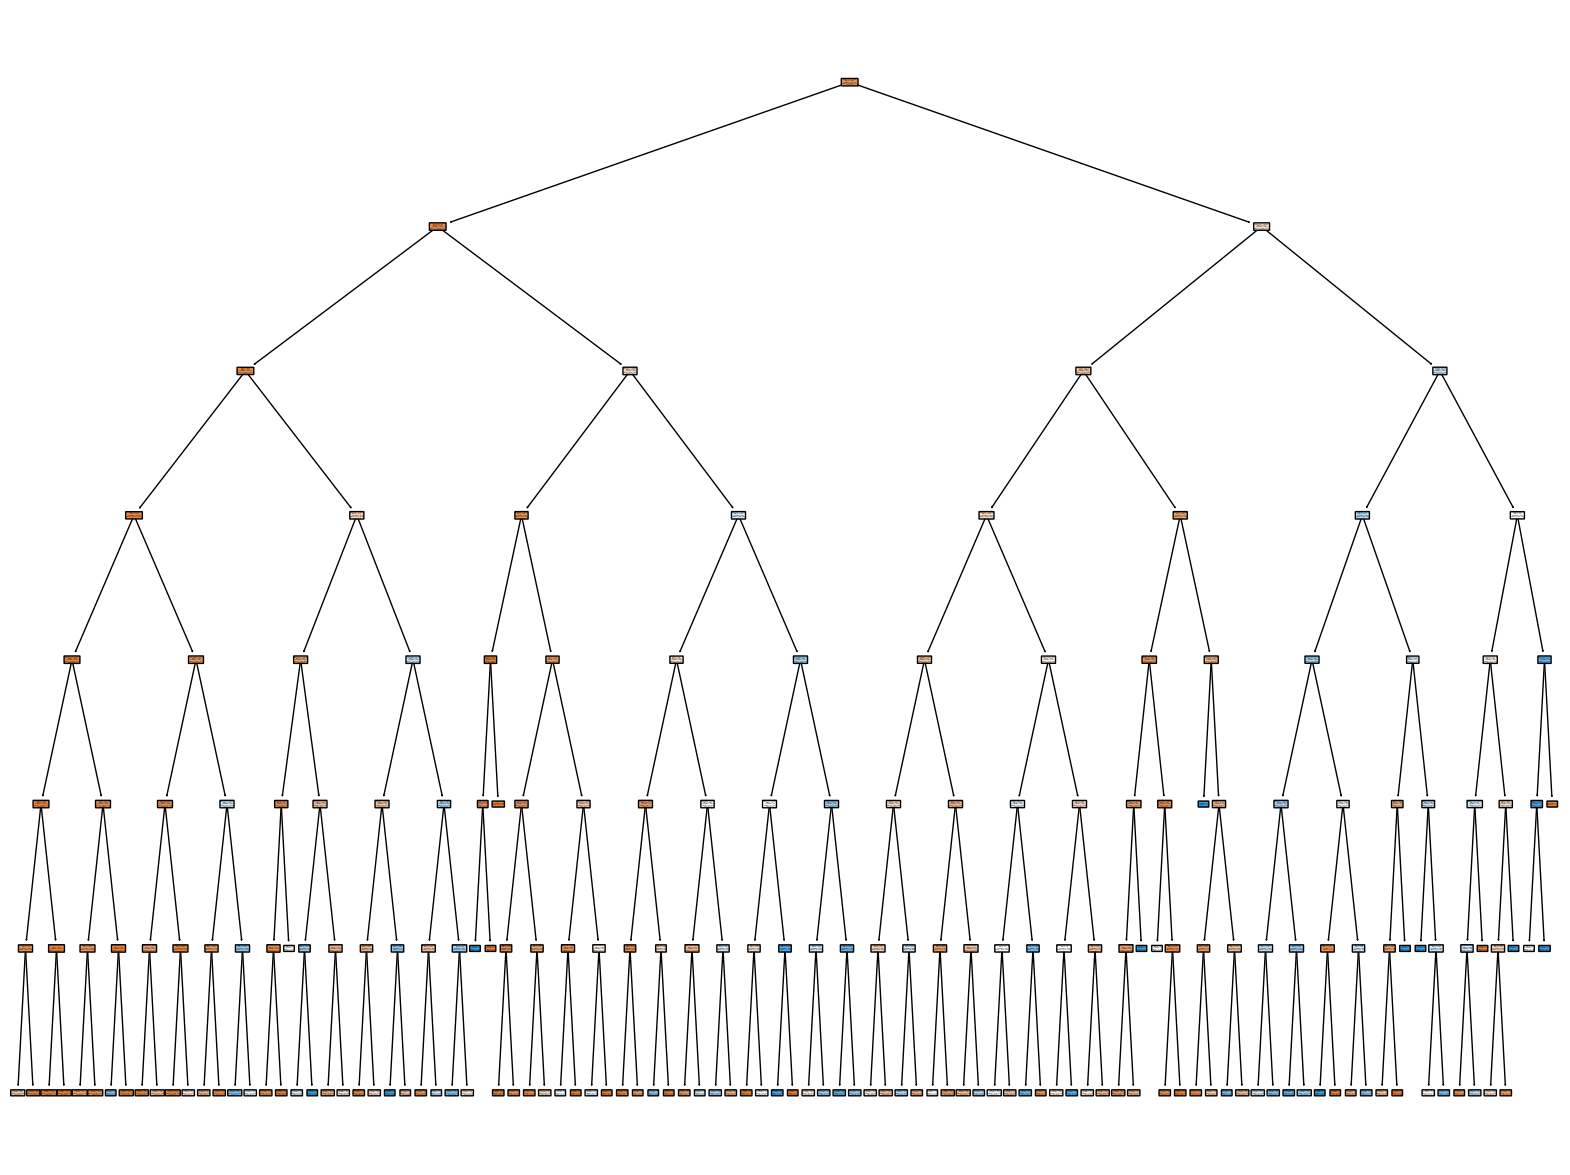

In [72]:
plt.figure(figsize=(20, 15))
tree.plot_tree(best_model, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], rounded=True)
plt.show()

In [49]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
def eval_model(y_test,y_pred):
    acc = accuracy_score(y_test,y_pred)
    print('Accuracy_Score',acc)
    cm = confusion_matrix(y_test,y_pred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(y_test,y_pred))

def mscore(model):
    train_score = model.score(X_train,y_train)
    test_score = model.score(X_test,y_test)
    print('Training Score',train_score)  
    print('Testing Score',test_score)

In [50]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [51]:
mscore(dt)

Training Score 0.9006856890068569
Testing Score 0.8935087913303107


In [52]:
ypred_dt = dt.predict(X_test)
print(ypred_dt)

['no' 'no' 'no' ... 'no' 'no' 'no']


In [53]:
eval_model(y_test,ypred_dt)

Accuracy_Score 0.8935087913303107
Confusion Matrix
 [[7644  308]
 [ 655  436]]
Classification Report
               precision    recall  f1-score   support

          no       0.92      0.96      0.94      7952
         yes       0.59      0.40      0.48      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.68      0.71      9043
weighted avg       0.88      0.89      0.88      9043



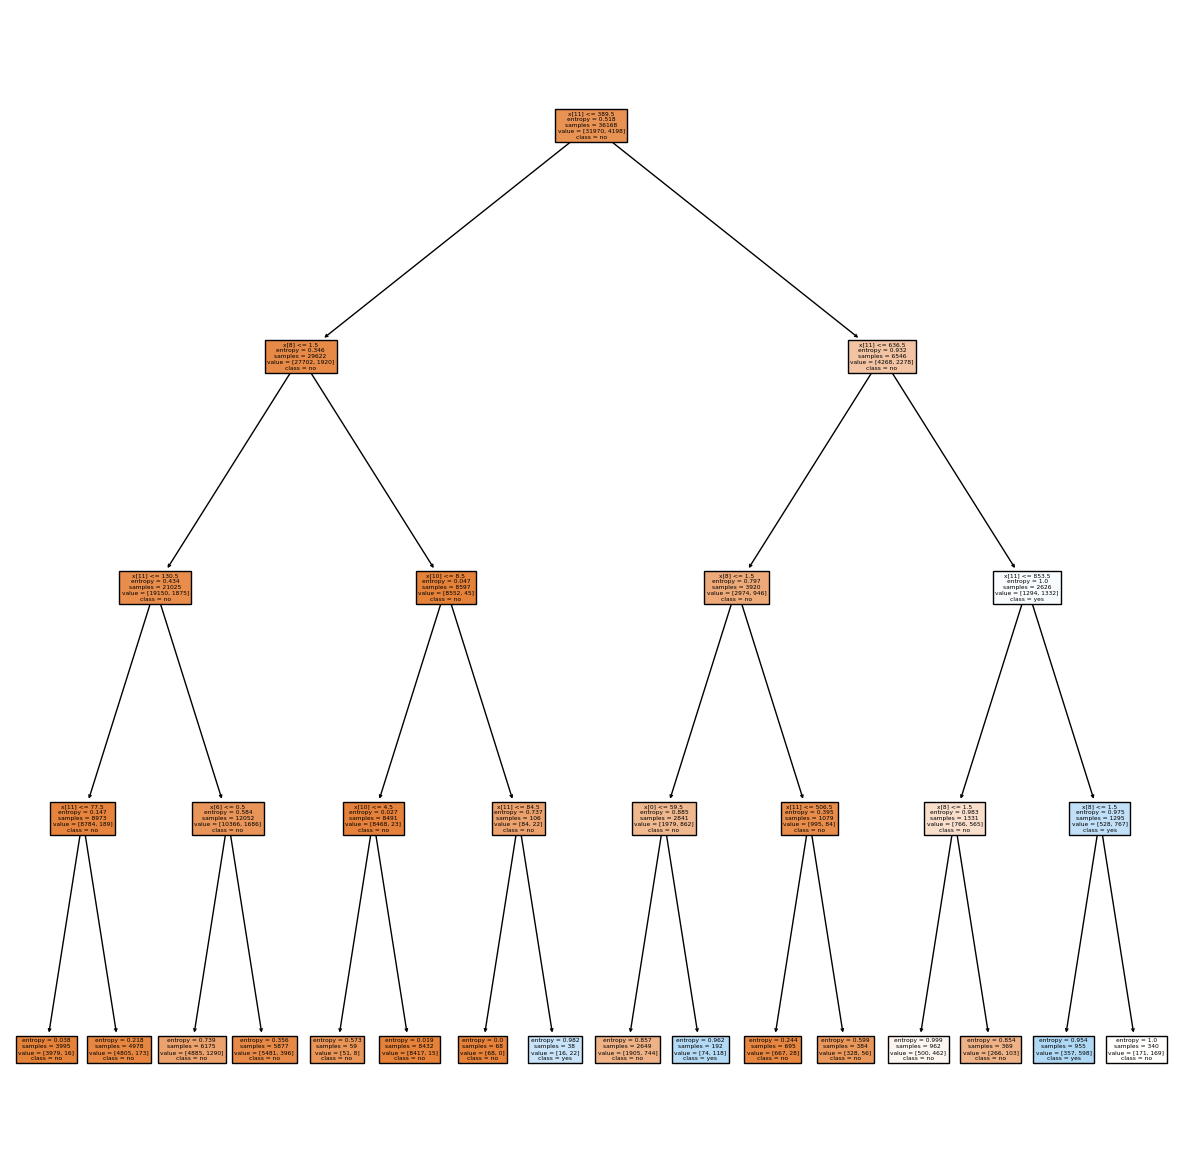

In [74]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming dt1 is your decision tree and cn is your class names
plt.figure(figsize=(15, 15))
plot_tree(dt1, class_names=cn, filled=True)
plt.show()